<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')
#We added this code so that it does not display errors as a red box

## Load and Prepare Data

Load data

In [3]:
df = pd.read_csv("train.csv")

## EDA

See the first 5 data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


See columns type and nan values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We should encode object values and fill nans
and finally scale data for better prediction

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

drop useless columns

In [8]:
df.drop(['Cabin', 'Name', 'Ticket'] ,axis = 1,inplace=True)

By drawing this diagram, we better understand the connection between the data

<AxesSubplot:>

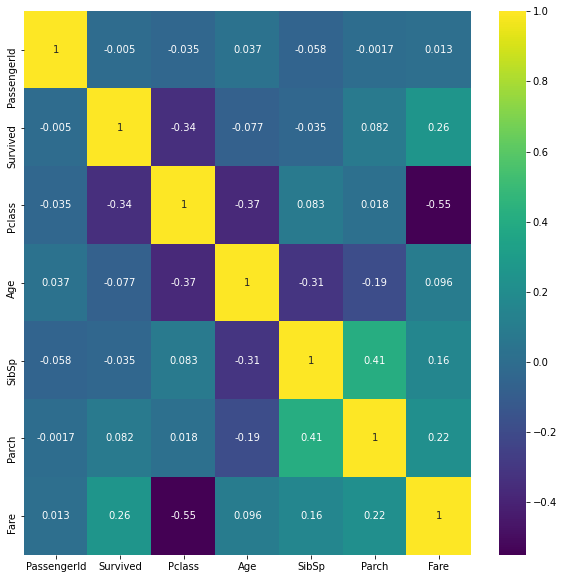

In [9]:
corr = df.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr, cmap='viridis', annot=True)
#After trying different cmaps, I think the best cmap is "viridis"

## Data Preprocessing

Encode "Sex" and "Embarked"
then fill nan

In [10]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [11]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [14]:
df.fillna(df.mean(), inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 59.3 KB


scalling after stolytelling

In [17]:
def count_values(m):
    x = 0
    for i in df[m].value_counts():
        x += 1
    print(x)

In [18]:
print("the value_counts of all colums: ")
for i in df.columns:
    print(i,end=" ")
    count_values(i)

the value_counts of all colums: 
PassengerId 891
Survived 2
Pclass 3
Sex 2
Age 89
SibSp 7
Parch 7
Fare 248
Embarked 4


## Storytelling - Visualization

draw diagrams for better understanding connections

In [19]:
df.groupby(['Sex','Survived'])['Sex'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Sex, dtype: int64

In [20]:
pd.crosstab(df.Sex,df.Survived)

Survived,0,1
Sex,,
0,81,233
1,468,109


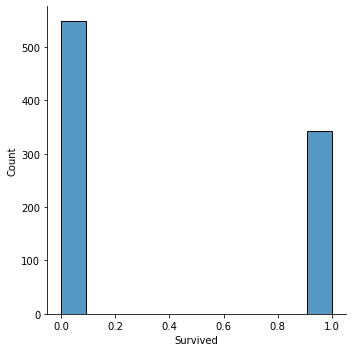

In [21]:
sns.displot(df,x='Survived')

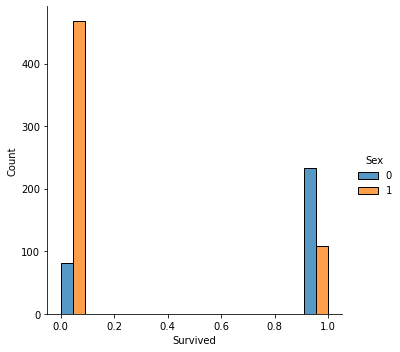

In [22]:
sns.displot(df,x='Survived',hue='Sex', multiple='dodge')

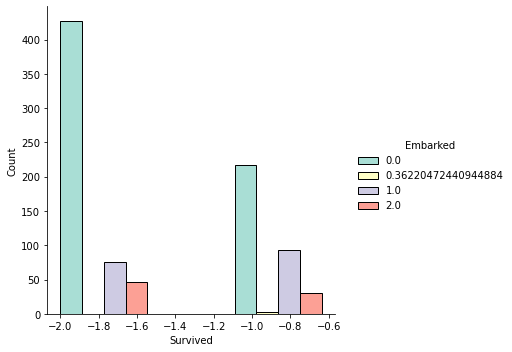

In [23]:
sns.displot(df,x='Survived',hue='Embarked', multiple='dodge',shrink=5,palette='Set3')

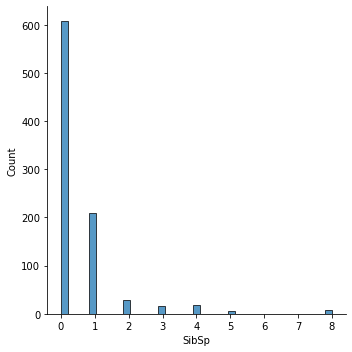

In [24]:
sns.displot(df,x='SibSp', multiple='dodge',palette='crest')

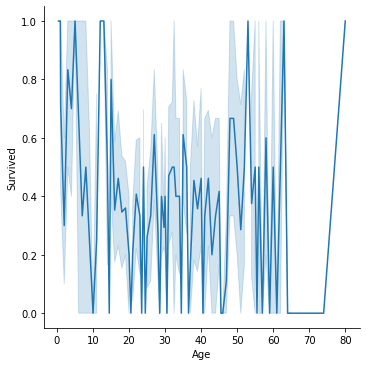

In [25]:
sns.relplot(x='Age',y='Survived',data=df,kind='line')

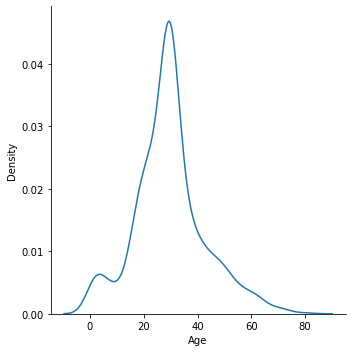

In [26]:
sns.displot(df, x="Age", kind="kde", palette="rainbow_r")

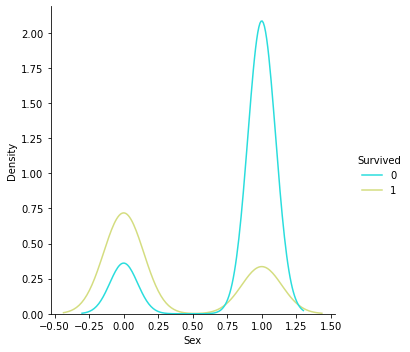

In [27]:
sns.displot(df, x="Sex",hue="Survived", kind="kde", palette="rainbow")

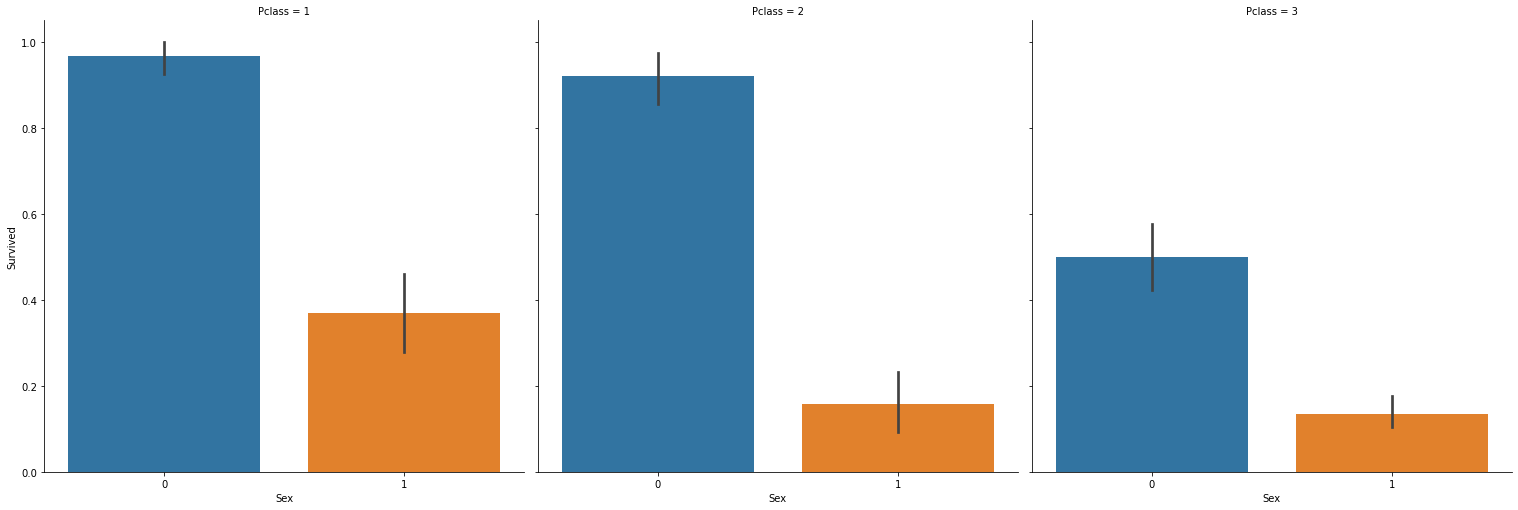

In [28]:
sns.catplot(x="Sex",y="Survived",col='Pclass',kind="bar",height=7,data=df)

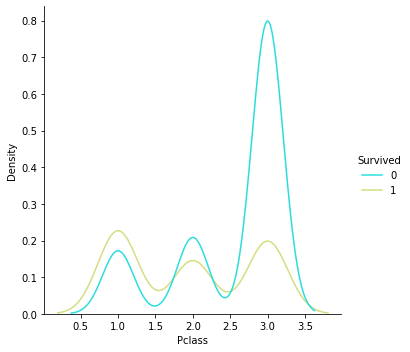

In [29]:
sns.displot(df, x='Pclass',hue="Survived", kind="kde", palette="rainbow")

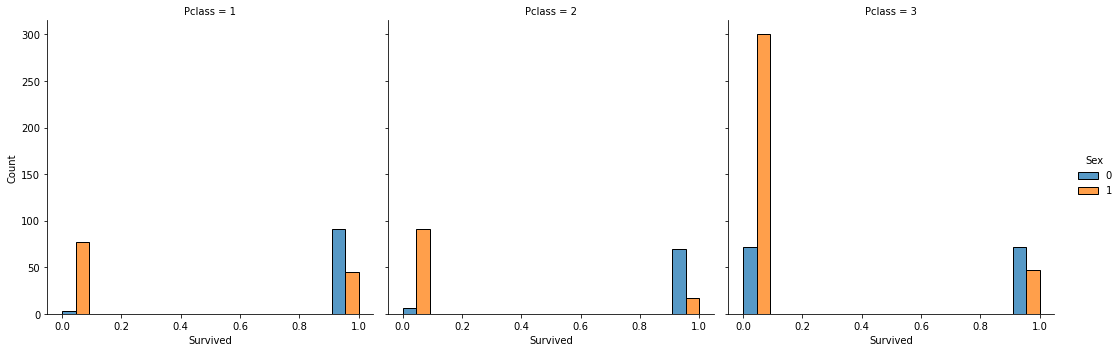

In [30]:
sns.displot(df,x='Survived',col='Pclass',hue='Sex', multiple='dodge')

Wealthy people and women have a better chance of survival

## Data Preprocessing 2

scale data

we scale data after storytelling to draw the best plots

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


In [32]:
X = df.iloc[:, 2:].values
Y = df.iloc[:, 1].values

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 9)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [35]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
x_train

array([[-1.53495097, -1.38062393,  0.41339677, ..., -0.48057752,
         2.18160191, -0.57343855],
       [ 0.83830655,  0.7243102 ,  1.96570144, ..., -0.48057752,
        -0.49529018, -0.57343855],
       [-1.53495097,  0.7243102 , -1.40393552, ...,  2.01702244,
         1.85359145, -0.57343855],
       ...,
       [ 0.83830655, -1.38062393,  0.86772984, ...,  5.76342239,
         0.16851279, -0.57343855],
       [ 0.83830655,  0.7243102 , -2.00971295, ...,  0.76822246,
        -0.33058522, -0.57343855],
       [ 0.83830655,  0.7243102 ,  0.18623023, ..., -0.48057752,
        -0.49791287, -0.57343855]])

data ready for training

## Train your model (Classification)

we train 6  model for this project :

1.Logistic Regression

In [37]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_pred_logreg = logreg.predict(x_test)

In [39]:
logreg_acc = accuracy_score(y_test, y_pred_logreg)

In [40]:
print('The accuracy of Logistic Regression is: ', (logreg_acc))

The accuracy of Logistic Regression is:  0.770949720670391


In [41]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.80      0.65      0.71        79

    accuracy                           0.77       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



2.Naive Bayes

In [42]:
naive = GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [43]:
y_pred_naive = naive.predict(x_test)

In [44]:
naive_acc = accuracy_score(y_test, y_pred_naive)

In [45]:
print('The accuracy of Naive Bayes is: ', (naive_acc))

The accuracy of Naive Bayes is:  0.7541899441340782


In [46]:
print(classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       100
           1       0.74      0.68      0.71        79

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179



3.K-Nearest_Neighbor(KNN)

In [47]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred_knn = knn.predict(x_test)

In [49]:
knn_acc = accuracy_score(y_test, y_pred_knn)

In [50]:
print('The accuracy of K-Nearest_Neighbor is: ', (knn_acc))

The accuracy of K-Nearest_Neighbor is:  0.7821229050279329


In [51]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       100
           1       0.82      0.65      0.72        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



4.Support Vector Machine(SVM)

In [52]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [53]:
y_pred_svm = svc.predict(x_test)

In [54]:
svm_acc = accuracy_score(y_test, y_pred_svm)

In [55]:
print('The accuracy of Support Vector Machine is: ', (svm_acc))

The accuracy of Support Vector Machine is:  0.776536312849162


In [56]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       100
           1       0.85      0.59      0.70        79

    accuracy                           0.78       179
   macro avg       0.80      0.76      0.76       179
weighted avg       0.79      0.78      0.77       179



5.Decision Tree

In [57]:
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [58]:
y_pred_dtree = dtree.predict(x_test)

In [59]:
dtree_acc = accuracy_score(y_test, y_pred_dtree)

In [60]:
print('The accuracy of Decision Tree is: ', (dtree_acc))

The accuracy of Decision Tree is:  0.7430167597765364


In [61]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       100
           1       0.75      0.63      0.68        79

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



6.Random Forest

In [62]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [63]:
y_pred_rf = rfc.predict(x_test)

In [64]:
rf_acc = accuracy_score(y_test, y_pred_rf)

In [65]:
print('The accuracy of Random Forest is: ', (rf_acc))

The accuracy of Random Forest is:  0.7821229050279329


In [66]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.81      0.66      0.73        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



7.XGBoost

In [67]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

[00:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_pred_xgb = xgb.predict(x_test)

In [69]:
xgb_acc = accuracy_score(y_test, y_pred_xgb)

In [70]:
print('The accuracy of XGBoost is: ', (xgb_acc))

The accuracy of XGBoost is:  0.770949720670391


In [71]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.83      0.61      0.70        79

    accuracy                           0.77       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.78      0.77      0.76       179



## Test Result

now we can predict test values

In [72]:
df_test = pd.read_csv("test.csv")

In [73]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
df_test.drop(['Cabin', 'Name', 'Ticket'] ,axis = 1,inplace=True)

In [75]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [76]:
df_test['Embarked']=df_test['Embarked'].map({'S':0,'C':1,'Q':2})
df_test['Sex'] = le.transform(df_test['Sex'])

In [77]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [78]:
df_test.fillna(df.mean(), inplace=True)

In [79]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [80]:
X = df_test.iloc[:,1:].values
X = sc.transform(X)

In [81]:
df_sample = pd.read_csv("sampleSubmission.csv")

In [82]:
df_sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [83]:
df_sample.shape

(418, 2)

In [84]:
df_sample['PassengerId'].describe()

count     418.000000
mean     1100.500000
std       120.810458
min       892.000000
25%       996.250000
50%      1100.500000
75%      1204.750000
max      1309.000000
Name: PassengerId, dtype: float64

In [85]:
pred = []
for i in range(892,1310):
    a = X[i-892].reshape(1, -1)
    y = (int(logreg.predict(a))+ int(knn.predict(a))+ int(svc.predict(a))+ int(rfc.predict(a))+ int(xgb.predict(a))) / 5
    if y >= 0.5:pred.append(1)
    else:pred.append(0)

In [86]:
type(pred)

list

In [87]:
df_sample.drop(["Survived"] ,axis = 1,inplace=True)
print(df_sample.head())
df_sample['Survived'] = pred
print(df_sample.head())

   PassengerId
0          892
1          893
2          894
3          895
4          896
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


save result as csv file

In [88]:
df_sample.to_csv("final_sampleSubmission.csv", index=False)

## Send us the Result (Maktabkhoone)